In [1]:
# import libraries

# data analysis

import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

# ignore warning 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:\\Users\\divyam07\\Desktop\\Project Datascience\\House Price Prediction\\Given Data\\train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
df.isnull().sum().sort_values(ascending = False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
                 ... 
CentralAir          0
SaleCondition       0
Heating             0
TotalBsmtSF         0
Id                  0
Length: 81, dtype: int64

In [6]:
df.drop(['PoolQC'], axis = 1 , inplace = True)

In [7]:
df.drop(['MiscFeature'], axis = 1 , inplace = True)

In [8]:
df.drop(['Alley'], axis = 1 , inplace = True)

In [9]:
df.drop(['Fence'], axis = 1 , inplace = True)

In [10]:
df.isnull().sum().sort_values(ascending = False)

FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
                ... 
CentralAir         0
HeatingQC          0
SaleCondition      0
TotalBsmtSF        0
Id                 0
Length: 77, dtype: int64

In [11]:
df['FireplaceQu'] =df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['LotFrontage'] =df['LotFrontage'].fillna(df['LotFrontage'].mean())
df['GarageYrBlt'] =df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())
df['GarageType'] =df['GarageType'].fillna(df['GarageType'].mode()[0])
df['GarageFinish'] =df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])

In [12]:
df.isnull().sum().sort_values(ascending = False)

GarageCond      81
GarageQual      81
BsmtFinType2    38
BsmtExposure    38
BsmtFinType1    37
                ..
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Id               0
Length: 77, dtype: int64

In [13]:
df['GarageCond'] =df['GarageCond'].fillna(df['GarageCond'].mode()[0])
df['GarageQual'] =df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['BsmtFinType2'] =df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
df['BsmtExposure'] =df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType1'] =df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])

In [14]:
df.isnull().sum().sort_values(ascending = False)

BsmtQual        37
BsmtCond        37
MasVnrType       8
MasVnrArea       8
Electrical       1
                ..
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
Id               0
Length: 77, dtype: int64

In [15]:
df.loc[:,df.isnull().any()].head()

,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,Electrical
0,BrkFace,196.0,Gd,TA,SBrkr
1,None,0.0,Gd,TA,SBrkr
2,BrkFace,162.0,Gd,TA,SBrkr
3,None,0.0,TA,Gd,SBrkr
4,BrkFace,350.0,Gd,TA,SBrkr


In [16]:
df['MasVnrType'] =df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['BsmtQual'] =df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['BsmtCond'] =df['Electrical'].fillna(df['Electrical'].mode()[0])
df['Electrical'] =df['Electrical'].fillna(df['Electrical'].mode()[0])
df['MasVnrArea'] =df['MasVnrArea'].fillna(df['MasVnrArea'].mean())

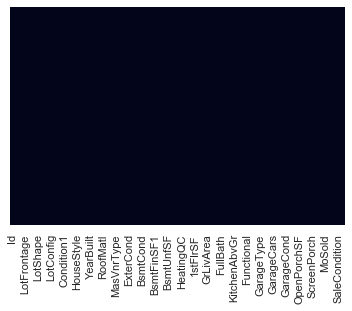

In [17]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [18]:
df.dropna(inplace=True)

In [19]:
df.shape

(1460, 77)

In [20]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [21]:
df.columns
col =['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice']

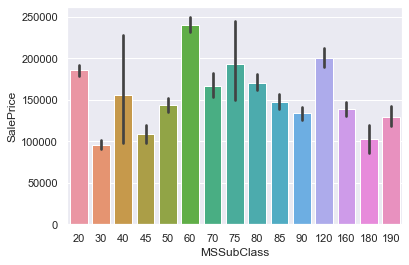

In [22]:
sns.barplot(x="MSSubClass", y="SalePrice", data=df)

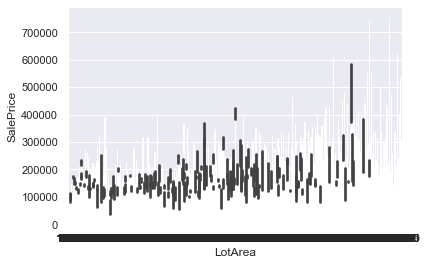

In [23]:
sns.barplot(x="LotArea", y="SalePrice", data=df)

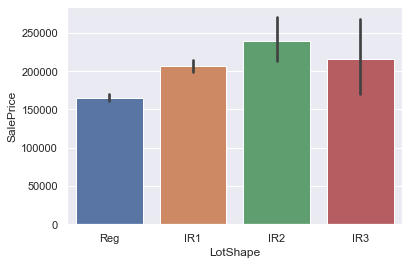

In [24]:
sns.barplot(x="LotShape", y="SalePrice", data=df)

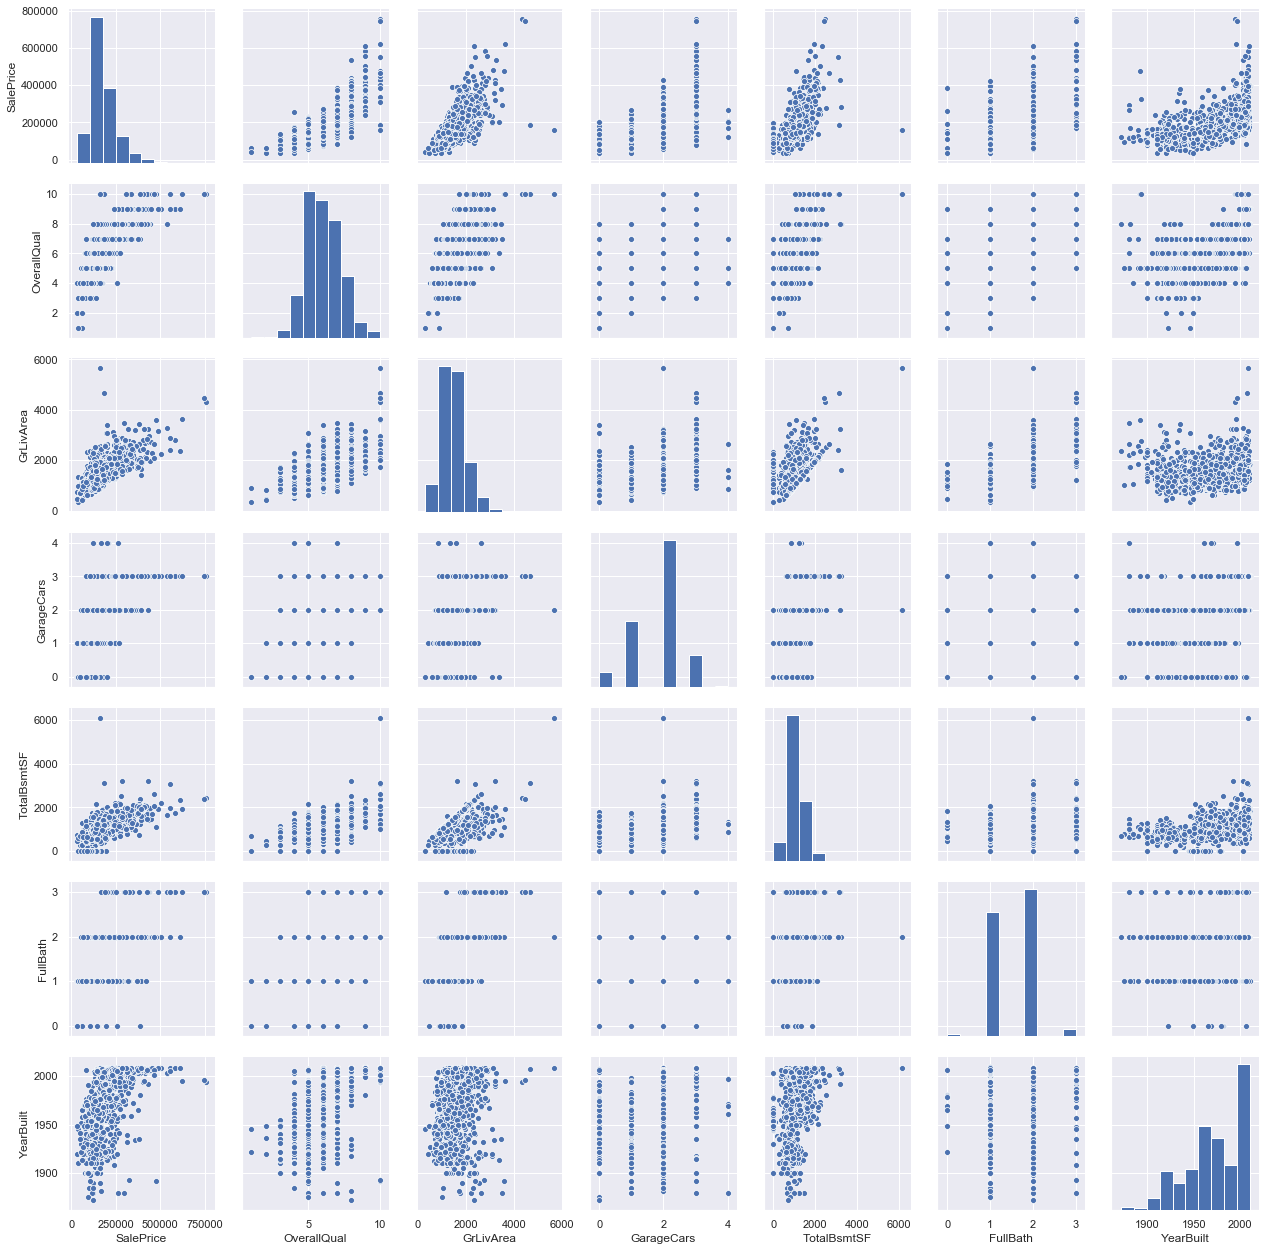

In [25]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df[cols], size = 2.5)
plt.show();


In [26]:
## Combine Test Data 

test_df=pd.read_csv('formulatedtest.csv')

In [27]:
test_df.shape

(1459, 76)

In [28]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal


In [29]:
merge_data = pd.concat([df,test_df],keys = ('train','test'))

In [30]:
merge_data.shape

(2919, 77)

In [31]:
merge_data.isnull().sum().sort_values(ascending = False)

SalePrice      1459
Electrical        0
ExterCond         0
ExterQual         0
Exterior1st       0
               ... 
MSSubClass        0
MSZoning          0
MasVnrArea        0
MasVnrType        0
1stFlrSF          0
Length: 77, dtype: int64

In [32]:
numeric_datatypes = merge_data.select_dtypes(include = [np.number]).columns.tolist()
numeric_datatypes

['1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'BedroomAbvGr',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtUnfSF',
 'EnclosedPorch',
 'Fireplaces',
 'FullBath',
 'GarageArea',
 'GarageCars',
 'GarageYrBlt',
 'GrLivArea',
 'HalfBath',
 'Id',
 'KitchenAbvGr',
 'LotArea',
 'LotFrontage',
 'LowQualFinSF',
 'MSSubClass',
 'MasVnrArea',
 'MiscVal',
 'MoSold',
 'OpenPorchSF',
 'OverallCond',
 'OverallQual',
 'PoolArea',
 'SalePrice',
 'ScreenPorch',
 'TotRmsAbvGrd',
 'TotalBsmtSF',
 'WoodDeckSF',
 'YearBuilt',
 'YearRemodAdd',
 'YrSold']

In [33]:
merge_data_df_num = merge_data[numeric_datatypes]

In [34]:
categorical_datatypes = merge_data.select_dtypes(include = ['object']).columns.tolist()
categorical_datatypes

['BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtQual',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'FireplaceQu',
 'Foundation',
 'Functional',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotConfig',
 'LotShape',
 'MSZoning',
 'MasVnrType',
 'Neighborhood',
 'PavedDrive',
 'RoofMatl',
 'RoofStyle',
 'SaleCondition',
 'SaleType',
 'Street',
 'Utilities']

In [35]:
merge_data_df_cat = merge_data[categorical_datatypes]

In [36]:
merge_data_df_cat_dummies = pd.get_dummies(merge_data_df_cat)

In [37]:
house_data_dummy = pd.concat([merge_data_df_num,merge_data_df_cat_dummies],axis=1)

In [38]:
house_data_dummy.head()

1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr  BsmtFinSF1  BsmtFinSF2  \
train 0       856       854          0             3       706.0         0.0   
      1      1262         0          0             3       978.0         0.0   
      2       920       866          0             3       486.0         0.0   
      3       961       756          0             3       216.0         0.0   
      4      1145      1053          0             4       655.0         0.0   

         BsmtFullBath  BsmtHalfBath  BsmtUnfSF  EnclosedPorch  ...  \
train 0           1.0           0.0      150.0              0  ...   
      1           0.0           1.0      284.0              0  ...   
      2           1.0           0.0      434.0              0  ...   
      3           1.0           0.0      540.0            272  ...   
      4           1.0           0.0      490.0              0  ...   

         SaleType_ConLD  SaleType_ConLI  SaleType_ConLw  SaleType_New  \
train 0               0               0               0             0   
      1               0               0               0             0   
      2               0               0               0             0   
      3               0               0               0             0   
      4               0               0               0             0   

         SaleType_Oth  SaleType_WD  Street_Grvl  Street_Pave  \
train 0             0            1            0            1   
      1             0            1            0            1   
      2             0            1            0            1   
      3             0            1            0            1   
      4             0            1            0            1   

         Utilities_AllPub  Utilities_NoSeWa  
train 0                 1                 0  
      1                 1                 0  
      2                 1                 0  
      3                 1                 0  
      4                 1                 0  

[5 rows x 282 columns]

In [39]:
house_data_dummy.shape

(2919, 282)

In [40]:
house_data_dummy.isnull().sum()

1stFlrSF            0
2ndFlrSF            0
3SsnPorch           0
BedroomAbvGr        0
BsmtFinSF1          0
                   ..
SaleType_WD         0
Street_Grvl         0
Street_Pave         0
Utilities_AllPub    0
Utilities_NoSeWa    0
Length: 282, dtype: int64

In [41]:
house_data_dummy =house_data_dummy.loc[:,~house_data_dummy.columns.duplicated()]

In [42]:
house_data_dummy.shape

(2919, 282)

In [43]:
house_data_dummy.tail()

1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr  BsmtFinSF1  \
test 1454       546       546          0             3         0.0   
     1455       546       546          0             3       252.0   
     1456      1224         0          0             4      1224.0   
     1457       970         0          0             3       337.0   
     1458       996      1004          0             3       758.0   

           BsmtFinSF2  BsmtFullBath  BsmtHalfBath  BsmtUnfSF  EnclosedPorch  \
test 1454         0.0           0.0           0.0      546.0              0   
     1455         0.0           0.0           0.0      294.0              0   
     1456         0.0           1.0           0.0        0.0              0   
     1457         0.0           0.0           1.0      575.0              0   
     1458         0.0           0.0           0.0      238.0              0   

           ...  SaleType_ConLD  SaleType_ConLI  SaleType_ConLw  SaleType_New  \
test 1454  ...               0               0               0             0   
     1455  ...               0               0               0             0   
     1456  ...               0               0               0             0   
     1457  ...               0               0               0             0   
     1458  ...               0               0               0             0   

           SaleType_Oth  SaleType_WD  Street_Grvl  Street_Pave  \
test 1454             0            1            0            1   
     1455             0            1            0            1   
     1456             0            1            0            1   
     1457             0            1            0            1   
     1458             0            1            0            1   

           Utilities_AllPub  Utilities_NoSeWa  
test 1454                 1                 0  
     1455                 1                 0  
     1456                 1                 0  
     1457                 1                 0  
     1458                 1                 0  

[5 rows x 282 columns]

In [44]:
df_Train_=house_data_dummy.iloc[:1460,:]
df_Test_=house_data_dummy.iloc[1460:,:]

In [45]:
df_Train_.shape

(1460, 282)

In [46]:
df_Test_.shape

(1459, 282)

In [47]:
df_Test_.drop(['SalePrice'],axis=1,inplace=True)

In [48]:

X_train=df_Train_.drop(['SalePrice'],axis=1)
y_train=df_Train_['SalePrice']

In [49]:
import xgboost
classifier=xgboost.XGBRegressor()
classifier.fit(X_train,y_train)

[10:18:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [50]:
from sklearn.ensemble import RandomForestRegressor


In [51]:
import pickle
filename ='finalized_model.pkl'
pickle.dump(classifier,open(filename,'wb'))

In [53]:
y_pred=classifier.predict(df_Test_)

In [54]:
y_pred

array([119346.93, 157086.81, 174716.36, ..., 164537.45, 121198.73,
       235710.  ], dtype=float32)

In [55]:
pred=pd.DataFrame(y_pred)
sub_df=pd.read_csv('C:\\Users\\divyam07\\Desktop\\Project Datascience\\House Price Prediction\\Given Data\\sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission.csv',index=False)